# accurately predict tourist expenditure when visiting Tanzania.

In [304]:
import pandas as pd
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")


In [305]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [306]:
test_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


check for null values

In [307]:
train_df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [308]:
test_df.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [309]:
train_df.shape

(4809, 23)

In [310]:
test_df.shape

(1601, 22)

drop unimportant columns

In [311]:
train_df1 = train_df.drop("most_impressing", axis= "columns")
test_df1 = test_df.drop("most_impressing", axis= "columns")

In [312]:
# deal with missing valuesin travel with column
from sklearn.impute import SimpleImputer
imp_cols = ["travel_with"]

imp = SimpleImputer(strategy= "most_frequent")
imp.fit(train_df1[imp_cols])
imp.fit(test_df1[imp_cols])
train_df1[imp_cols] = imp.transform(train_df1[imp_cols])
test_df1[imp_cols] = imp.transform(test_df1[imp_cols])

In [313]:
from sklearn.impute import SimpleImputer
imp_cols = ["total_female", "total_male"]

imp = SimpleImputer(strategy= "most_frequent")
imp.fit(train_df1[imp_cols])
imp.fit(test_df1[imp_cols])
train_df1[imp_cols] = imp.transform(train_df1[imp_cols])
test_df1[imp_cols] = imp.transform(test_df1[imp_cols])

In [314]:
test_df1.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
dtype: int64

In [315]:
train_df1.shape

(4809, 22)

In [316]:
test_df1.shape

(1601, 21)

have a look at unique values

In [317]:
train_df1.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
total_cost               float64
dtype: object

In [318]:
# define af function
def print_unique(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [319]:
test_df.loc[test_df['payment_mode'] == "Travellers Cheque"]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
1508,tour_677,YEMEN,25-44,NaN,1.0,0.0,Meetings and Conference,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,No,3,0,Travellers Cheque,Yes,No comments


In [320]:
test_df1.loc[test_df1["ID"] == "tour_677"]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz
1508,tour_677,YEMEN,25-44,Alone,1.0,0.0,Meetings and Conference,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,No,No,3,0,Travellers Cheque,Yes


In [321]:
train_df1.loc[train_df1["ID"] == "tour_10"]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,14.0,7.0,Cash,Yes,3214906.5


In [322]:
print_unique(train_df1)

ID : ['tour_0' 'tour_10' 'tour_1000' ... 'tour_995' 'tour_997' 'tour_999']
country : ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'BURUNDI' 'SCOTLAND' 'RUSSIA'
 'GHANA' 'NIGER' 'MALAYSIA' 'COLOMBIA' 'LUXEMBOURG' 'NEPAL' 'POLAND'
 'SINGAPORE' 'LITHUANIA' 'HUNGARY' 'INDONESIA' 'TURKEY' 'TRINIDAD TOBACCO'
 'IRAQ' 'SLOVENIA' 'UNITED ARAB EMIRATES' 'COMORO' 'SRI LANKA' 'IRAN'
 'MONTENEGRO' 'ANGOLA' 'LEBANON' 'SLOVAKIA' 'ROMANIA' 'MEXICO' 'LATVIA'
 'CROATIA' 'CAPE VERDE' 'SU

In [323]:
print_unique(test_df1)


ID : ['tour_1' 'tour_100' 'tour_1001' ... 'tour_992' 'tour_996' 'tour_998']
country : ['AUSTRALIA' 'SOUTH AFRICA' 'GERMANY' 'CANADA' 'UNITED KINGDOM' 'DENMARK'
 'RUSSIA' 'FRANCE' 'SPAIN' 'SWIZERLAND' 'UNITED STATES OF AMERICA' 'CHINA'
 'INDIA' 'ZAMBIA' 'NEW ZEALAND' 'COMORO' 'NETHERLANDS' 'MALAYSIA' 'KENYA'
 'ITALY' 'FINLAND' 'MALAWI' 'BELGIUM' 'NORWAY' 'MALT' 'ETHIOPIA' 'OMAN'
 'CZECH REPUBLIC' 'GHANA' 'UAE' 'PORTUGAL' 'SINGAPORE' 'SWEDEN' 'UGANDA'
 'BRAZIL' 'QATAR' 'UKRAIN' 'ROMANIA' 'DRC' 'HUNGARY' 'RWANDA' 'AUSTRIA'
 'BOTSWANA' 'ZIMBABWE' 'IRELAND' 'JAPAN' 'IRAN' 'MOZAMBIQUE' 'SWAZILAND'
 'BULGARIA' 'ISRAEL' 'CHILE' 'SUDAN' 'BANGLADESH' 'SLOVAKIA' 'COSTARICA'
 'NAMIBIA' 'POLAND' 'DOMINICA' 'SCOTLAND' 'HAITI' 'PAKISTAN' 'TAIWAN'
 'PHILIPINES' 'VIETNAM' 'SERBIA' 'BURUNDI' 'BOSNIA' 'LIBERIA' 'PERU'
 'GREECE' 'INDONESIA' 'LEBANON' 'CAPE VERDE' 'JAMAICA'
 'UNITED ARAB EMIRATES' 'MORROCO' 'EGYPT' 'CYPRUS' 'MACEDONIA' 'CONGO'
 'GUINEA' 'ARGENTINA' 'YEMEN' 'SOMALI' 'KOREA' 'SAUD ARABIA']
a

In [324]:
test_df1.loc[test_df1['age_group'] == "24-Jan"]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,No,0,4,Cash,Yes
7,tour_1015,RUSSIA,24-Jan,Alone,1.0,0.0,Visiting Friends and Relatives,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,26,3,Cash,No
8,tour_1019,GERMANY,24-Jan,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,3,0,Cash,No
9,tour_1020,FRANCE,24-Jan,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,No,No,30,9,Cash,Yes
13,tour_1037,UNITED STATES OF AMERICA,24-Jan,Friends/Relatives,1.0,1.0,Scientific and Academic,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,30,0,Cash,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,tour_879,UNITED KINGDOM,24-Jan,Alone,1.0,0.0,Volunteering,Hunting tourism,others,Independent,...,No,No,No,No,No,No,7,0,Cash,Yes
1563,tour_888,INDIA,24-Jan,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,10,0,Cash,Yes
1580,tour_938,UNITED KINGDOM,24-Jan,Alone,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,No,No,21,3,Cash,Yes
1590,tour_964,GERMANY,24-Jan,Friends/Relatives,4.0,2.0,Leisure and Holidays,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,21,0,Credit Card,Yes


In [325]:
test_df1["age_group"] = test_df1["age_group"].replace(["24-Jan"], "1-24")

In [326]:
print_unique(test_df1)

ID : ['tour_1' 'tour_100' 'tour_1001' ... 'tour_992' 'tour_996' 'tour_998']
country : ['AUSTRALIA' 'SOUTH AFRICA' 'GERMANY' 'CANADA' 'UNITED KINGDOM' 'DENMARK'
 'RUSSIA' 'FRANCE' 'SPAIN' 'SWIZERLAND' 'UNITED STATES OF AMERICA' 'CHINA'
 'INDIA' 'ZAMBIA' 'NEW ZEALAND' 'COMORO' 'NETHERLANDS' 'MALAYSIA' 'KENYA'
 'ITALY' 'FINLAND' 'MALAWI' 'BELGIUM' 'NORWAY' 'MALT' 'ETHIOPIA' 'OMAN'
 'CZECH REPUBLIC' 'GHANA' 'UAE' 'PORTUGAL' 'SINGAPORE' 'SWEDEN' 'UGANDA'
 'BRAZIL' 'QATAR' 'UKRAIN' 'ROMANIA' 'DRC' 'HUNGARY' 'RWANDA' 'AUSTRIA'
 'BOTSWANA' 'ZIMBABWE' 'IRELAND' 'JAPAN' 'IRAN' 'MOZAMBIQUE' 'SWAZILAND'
 'BULGARIA' 'ISRAEL' 'CHILE' 'SUDAN' 'BANGLADESH' 'SLOVAKIA' 'COSTARICA'
 'NAMIBIA' 'POLAND' 'DOMINICA' 'SCOTLAND' 'HAITI' 'PAKISTAN' 'TAIWAN'
 'PHILIPINES' 'VIETNAM' 'SERBIA' 'BURUNDI' 'BOSNIA' 'LIBERIA' 'PERU'
 'GREECE' 'INDONESIA' 'LEBANON' 'CAPE VERDE' 'JAMAICA'
 'UNITED ARAB EMIRATES' 'MORROCO' 'EGYPT' 'CYPRUS' 'MACEDONIA' 'CONGO'
 'GUINEA' 'ARGENTINA' 'YEMEN' 'SOMALI' 'KOREA' 'SAUD ARABIA']
a

In [327]:
test_df1.loc[test_df1['age_group'] == "24-Jan"]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz


some data visualizaton

(array([4172.,    0.,    0.,  622.,    0.,    0.,    8.,    0.,    0.,
           7.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

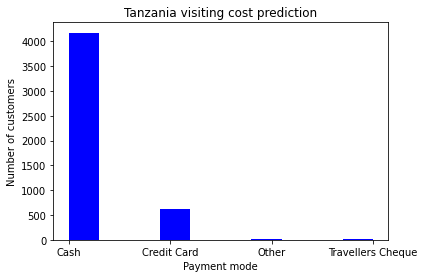

In [328]:

from matplotlib import pyplot as plt

plt.xlabel("Payment mode")
plt.ylabel("Number of customers")
plt.title("Tanzania visiting cost prediction")
plt.hist(train_df1.payment_mode, color= "blue")



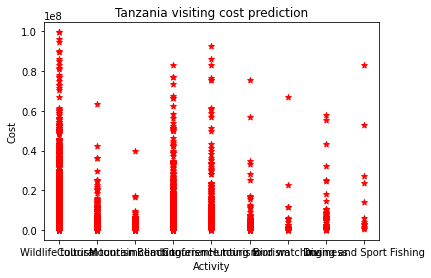

In [329]:
# see amount spent by visitors vs their main activity
plt.xlabel("Activity")
plt.ylabel("Cost")
plt.title("Tanzania visiting cost prediction")
plt.scatter(train_df1.main_activity, train_df1.total_cost, marker= "*", color= "red")

# label encoding


In [330]:
train_df1.head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,No,13.0,0.0,Cash,No,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,14.0,7.0,Cash,Yes,3214906.5


In [331]:
test_df1.head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,Yes,No,No,No,No,No,13,0,Cash,No


In [332]:
print_unique(train_df1)

ID : ['tour_0' 'tour_10' 'tour_1000' ... 'tour_995' 'tour_997' 'tour_999']
country : ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'BURUNDI' 'SCOTLAND' 'RUSSIA'
 'GHANA' 'NIGER' 'MALAYSIA' 'COLOMBIA' 'LUXEMBOURG' 'NEPAL' 'POLAND'
 'SINGAPORE' 'LITHUANIA' 'HUNGARY' 'INDONESIA' 'TURKEY' 'TRINIDAD TOBACCO'
 'IRAQ' 'SLOVENIA' 'UNITED ARAB EMIRATES' 'COMORO' 'SRI LANKA' 'IRAN'
 'MONTENEGRO' 'ANGOLA' 'LEBANON' 'SLOVAKIA' 'ROMANIA' 'MEXICO' 'LATVIA'
 'CROATIA' 'CAPE VERDE' 'SU

In [333]:
print_unique(test_df1)

ID : ['tour_1' 'tour_100' 'tour_1001' ... 'tour_992' 'tour_996' 'tour_998']
country : ['AUSTRALIA' 'SOUTH AFRICA' 'GERMANY' 'CANADA' 'UNITED KINGDOM' 'DENMARK'
 'RUSSIA' 'FRANCE' 'SPAIN' 'SWIZERLAND' 'UNITED STATES OF AMERICA' 'CHINA'
 'INDIA' 'ZAMBIA' 'NEW ZEALAND' 'COMORO' 'NETHERLANDS' 'MALAYSIA' 'KENYA'
 'ITALY' 'FINLAND' 'MALAWI' 'BELGIUM' 'NORWAY' 'MALT' 'ETHIOPIA' 'OMAN'
 'CZECH REPUBLIC' 'GHANA' 'UAE' 'PORTUGAL' 'SINGAPORE' 'SWEDEN' 'UGANDA'
 'BRAZIL' 'QATAR' 'UKRAIN' 'ROMANIA' 'DRC' 'HUNGARY' 'RWANDA' 'AUSTRIA'
 'BOTSWANA' 'ZIMBABWE' 'IRELAND' 'JAPAN' 'IRAN' 'MOZAMBIQUE' 'SWAZILAND'
 'BULGARIA' 'ISRAEL' 'CHILE' 'SUDAN' 'BANGLADESH' 'SLOVAKIA' 'COSTARICA'
 'NAMIBIA' 'POLAND' 'DOMINICA' 'SCOTLAND' 'HAITI' 'PAKISTAN' 'TAIWAN'
 'PHILIPINES' 'VIETNAM' 'SERBIA' 'BURUNDI' 'BOSNIA' 'LIBERIA' 'PERU'
 'GREECE' 'INDONESIA' 'LEBANON' 'CAPE VERDE' 'JAMAICA'
 'UNITED ARAB EMIRATES' 'MORROCO' 'EGYPT' 'CYPRUS' 'MACEDONIA' 'CONGO'
 'GUINEA' 'ARGENTINA' 'YEMEN' 'SOMALI' 'KOREA' 'SAUD ARABIA']
a

In [334]:
train_df2 = pd.get_dummies(data= train_df1, columns= ["age_group", "travel_with", "payment_mode"])
test_df2 = pd.get_dummies(data= test_df1, columns= ["age_group", "travel_with", "payment_mode"])

In [335]:
# assign 0 or 1 to NO or Yes
zero_one = ["package_transport_int", "package_accomodation", "package_food", "package_transport_tz", "package_sightseeing", "package_guided_tour",
            "package_insurance", "first_trip_tz"]
def zerone(df):
  for zero_one in df:
    df[zero_one].replace({"No": 0, "Yes": 1}, inplace= True)

In [336]:
zerone(train_df2)
zerone(test_df2)

In [337]:
# convert tour package column
train_df2["tour_arrangement"].replace({"Independent": 0, "Package Tour": 1}, inplace= True)
train_df2["tour_arrangement"].unique()

test_df2["tour_arrangement"].replace({"Independent": 0, "Package Tour": 1}, inplace= True)
test_df2["tour_arrangement"].unique()


array([1, 0])

In [338]:
# label encodeing
from sklearn.preprocessing import LabelEncoder


# define class for label encoding
columns = ["country", "purpose", "main_activity", "info_source"]

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [339]:
train_df2 = MultiColumnLabelEncoder(columns).fit_transform(train_df2)
test_df2 = MultiColumnLabelEncoder(columns).fit_transform(test_df2)



In [340]:
print_unique(train_df2)

ID : ['tour_0' 'tour_10' 'tour_1000' ... 'tour_995' 'tour_997' 'tour_999']
country : [ 89  99  13  83 100  67  35   7  10  55  60  77   4  61  31  44   0  39
  21  84  29  41  25  74  53  43  88  64  95  96   3 102  65   5  68 104
 103  16   8  70  33  56  24  69  73  45  87  93  46  23  40  28  20  97
  27   9  78  76  32  66  54  14  51  63  72  80  50  34  36  94  92  38
  82  98  15  85  37  58   1  48  81  75  57  47  18  11  86  17  12  62
  90  79  49  30  71  42  52  22  19   2 101  59  91   6  26]
total_female : [ 1.  0.  2.  4.  3.  5. 12. 10.  6. 11.  7. 15.  9. 49.]
total_male : [ 1.  0.  2.  3.  4.  5.  6. 15. 17.  7. 10. 12. 44.  9.]
purpose : [1 5 0 2 6 4 3]
main_activity : [7 3 6 0 2 5 1 8 4]
info_source : [0 7 5 2 3 6 1 4]
tour_arrangement : [0 1]
package_transport_int : [0 1]
package_accomodation : [0 1]
package_food : [0 1]
package_transport_tz : [0 1]
package_sightseeing : [0 1]
package_guided_tour : [0 1]
package_insurance : [0 1]
night_mainland : [ 13.  14.   1.  

In [341]:
print_unique(test_df2)

ID : ['tour_1' 'tour_100' 'tour_1001' ... 'tour_992' 'tour_996' 'tour_998']
country : [ 1 70 26 10 81 19 62 25 71 75 82 13 32 85 52 14 51 46 40 37 24 45  4 53
 47 23 54 18 27 77 59 67 74 78  7 60 79 61 21 31 63  2  6 86 35 39 34 49
 73  8 36 12 72  3 68 16 50 58 20 65 30 55 76 57 83 66  9  5 43 56 28 33
 42 11 38 80 48 22 17 44 15 29  0 84 69 41 64]
total_female : [ 1.  0.  3.  2.  4.  5.  9. 10.  7. 11.  6. 20. 12.]
total_male : [ 1.  4.  0.  2.  3.  5. 10.  7.  6. 40.]
purpose : [1 0 6 2 5 4 3]
main_activity : [7 0 3 6 8 5 2 1 4]
info_source : [5 3 0 7 1 2 4 6]
tour_arrangement : [1 0]
package_transport_int : [1 0]
package_accomodation : [1 0]
package_food : [1 0]
package_transport_tz : [1 0]
package_sightseeing : [1 0]
package_guided_tour : [1 0]
package_insurance : [1 0]
night_mainland : [ 10  13   7   0  55   9  26   3  30   6  21   5   2  12  15  11  33  19
   1  14  27  40  23  90  64   4  24  16  22  17  70  31  62  63  37  20
 160  29  25  42  35  44  32  60  34  45  51  50 66

# data scaling

createe X and Y_train

In [342]:
X_train = train_df2.drop("total_cost", axis= 1)
y_train = train_df2.total_cost
X_test = test_df2.copy()

In [343]:
le = LabelEncoder()
X_train["ID"] = le.fit_transform(X_train["ID"])
X_test["ID"] = le.fit_transform(X_test["ID"])


In [344]:
print_unique(X_test)

ID : [   0    1    2 ... 1598 1599 1600]
country : [ 1 70 26 10 81 19 62 25 71 75 82 13 32 85 52 14 51 46 40 37 24 45  4 53
 47 23 54 18 27 77 59 67 74 78  7 60 79 61 21 31 63  2  6 86 35 39 34 49
 73  8 36 12 72  3 68 16 50 58 20 65 30 55 76 57 83 66  9  5 43 56 28 33
 42 11 38 80 48 22 17 44 15 29  0 84 69 41 64]
total_female : [ 1.  0.  3.  2.  4.  5.  9. 10.  7. 11.  6. 20. 12.]
total_male : [ 1.  4.  0.  2.  3.  5. 10.  7.  6. 40.]
purpose : [1 0 6 2 5 4 3]
main_activity : [7 0 3 6 8 5 2 1 4]
info_source : [5 3 0 7 1 2 4 6]
tour_arrangement : [1 0]
package_transport_int : [1 0]
package_accomodation : [1 0]
package_food : [1 0]
package_transport_tz : [1 0]
package_sightseeing : [1 0]
package_guided_tour : [1 0]
package_insurance : [1 0]
night_mainland : [ 10  13   7   0  55   9  26   3  30   6  21   5   2  12  15  11  33  19
   1  14  27  40  23  90  64   4  24  16  22  17  70  31  62  63  37  20
 160  29  25  42  35  44  32  60  34  45  51  50 664  57 130]
night_zanzibar : [  3   

# Evaluate best model to apply

In [345]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [346]:
def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        }
    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

In [347]:
find_best_model_using_gridsearchcv(X_train, y_train)

,model,best_score,best_params
0,linear_regression,0.305061,{'normalize': True}
1,lasso,0.304915,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,-0.311208,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


consider the linear regression model

In [348]:
ss = pd.read_csv("SampleSubmission.csv")
ss.head()

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0


In [350]:
lr = LinearRegression(normalize= True)
lr.fit(X_train, y_train)


LinearRegression(normalize=True)

In [352]:
y_pred = lr.predict(X_test)
y_pred

array([17767104., 11622080.,  6176192., ...,  -294080., -1134272.,
        4564544.])

In [355]:
# evaluate with cross_val_score

from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits = 10)
score = cross_val_score(lr, X_train, y_train, cv= kfold)
score.mean()

0.33426001383356474

try lasso

In [356]:
lasso = Lasso(alpha= 2, selection= "cyclic")
lasso.fit(X_train, y_train)
scorela = cross_val_score(lasso, X_train, y_train, cv= kfold)
scorela.mean()

0.33425229869782863

slight difference in accuracy

but use linear regression

# Submission

In [358]:
# since Id was transformed, we need to inverse transform it
X_test["ID"] = le.inverse_transform (X_test["ID"])

In [359]:
X_test.dtypes

ID                                  object
country                              int64
total_female                       float64
total_male                         float64
purpose                              int64
main_activity                        int64
info_source                          int64
tour_arrangement                     int64
package_transport_int                int64
package_accomodation                 int64
package_food                         int64
package_transport_tz                 int64
package_sightseeing                  int64
package_guided_tour                  int64
package_insurance                    int64
night_mainland                       int64
night_zanzibar                       int64
first_trip_tz                        int64
age_group_1-24                       uint8
age_group_25-44                      uint8
age_group_45-64                      uint8
age_group_65+                        uint8
travel_with_Alone                    uint8
travel_with

In [360]:
sub = pd.DataFrame(
    {"ID" : X_test["ID"],
     "total_cost": y_pred}, columns= ["ID", "total_cost"]
)

In [361]:
sub.shape

(1601, 2)

In [363]:
sub.head()

,ID,total_cost
0,tour_1,17767104.0
1,tour_100,11622080.0
2,tour_1001,6176192.0
3,tour_1006,3837120.0
4,tour_1009,16836416.0


In [364]:
sub.to_csv("submission.csv", index= False)